# Facebook Data Analysis

In [3]:
from pandas import Series, DataFrame
import pandas as pd
# Resetting plotting Defaults
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
fb=pd.read_csv("facebook.csv", dtype=unicode, sep=',')
fb=fb.astype({'userid': int64,
'age':int64,
'dob_day':                    int64,
'dob_year':                   int64,
'dob_month':                  int64,
'gender':                     str,
'tenure':                   float64,
'friend_count':               int64,
'friendships_initiated':      int64,
'likes':                      int64,
'likes_received':             int64,
'mobile_likes' :              int64,
'mobile_likes_received':      int64,
'www_likes':                  int64,
'www_likes_received':         int64})

In [5]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   99003 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


# 1. Sanity check

In [6]:
check_null=fb.isnull()

In [7]:
sum(check_null)

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   2
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

Observation: Gender & tenure has null values, we should not delete these as users might have kept it blank

### Generic Variable distribution

In [8]:
fb.columns.values

array(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender',
       'tenure', 'friend_count', 'friendships_initiated', 'likes',
       'likes_received', 'mobile_likes', 'mobile_likes_received',
       'www_likes', 'www_likes_received'], dtype=object)

In [9]:
fb.dtypes

userid                     int64
age                        int64
dob_day                    int64
dob_year                   int64
dob_month                  int64
gender                    object
tenure                   float64
friend_count               int64
friendships_initiated      int64
likes                      int64
likes_received             int64
mobile_likes               int64
mobile_likes_received      int64
www_likes                  int64
www_likes_received         int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fb56fd0>,
      dtype=object)

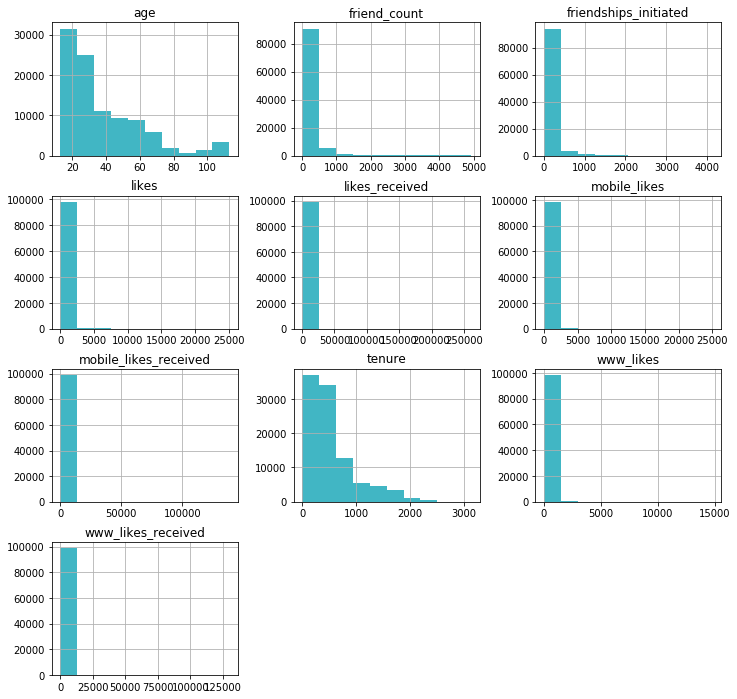

In [10]:
forhist=['age','friend_count', 'friendships_initiated', 'likes',
       'likes_received', 'mobile_likes', 'mobile_likes_received',
       'www_likes','www_likes_received','tenure']
fb_subset1=pd.DataFrame(fb[forhist])
fb_subset1.hist(figsize=(12,12), color='#41b6c4')

In [11]:
# remove outliers
def rem_out(elements):
    mean = numpy.mean(elements, axis=0)
    sd = numpy.std(elements, axis=0)
    final_list = [x for x in elements if (x > mean - 2 * sd)]
    final_list = [x for x in final_list if (x < mean + 2 * sd)]
    return final_list

### Users with most number of likes


In [12]:
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)

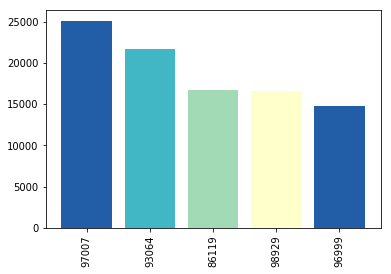

In [13]:
#mycolors=np.array(['#F8B195','#F67280','#C06C84','#6C5B7B', '#355C7D'])
mycolors=np.array(['#225ea8', '#41b6c4', '#a1dab4', '#ffffcc'])
k=fb[['userid','likes']].reset_index()
k['likes'].sort_values(ascending=False)[:5].plot(kind='bar', color=mycolors, width=0.8)


### Friend count DIstribution
For 95% observations we have friend count between 0 to 1000

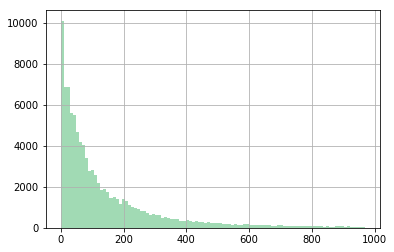

In [14]:
pd.Series(rem_out(fb_subset1['friend_count'])).hist(bins=100, color='#a1dab4')

In [15]:
# Top 5
fb[['friend_count','userid']].sort_values(by='friend_count', ascending = False)[:5].set_index('userid')

,friend_count
userid,
2090699,4923
1660276,4917
1926655,4863
1685573,4845
1386477,4844


### Likes Distribution

For 95% observations we have likes between 0 to 1200

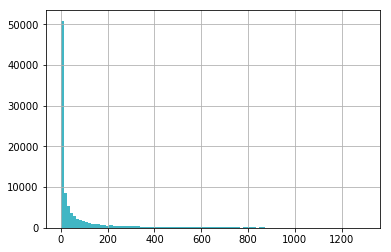

In [16]:
Generic_likes=rem_out(fb['likes'])
pd.Series(Generic_likes).hist(bins=100, color='#41b6c4')

# 2. Exploratory Data Analysis

### Correlation plot shows magnitude of correlation between pairwise variables in dataset

1. Friend count & friendships inititated are strongly correlated
2. We would ignore correlations of subsets of likes & likes received as these are bound to be correlated (here we refer to mobile & site likes/likes received)
3. Tenure and Age also seem to be related

In [17]:
import seaborn as sns # just a conventional alias, don't know why


In [18]:
# Remove object column in dataframe to use heatmap (Gender here)
cols=['age','tenure', 'friend_count', 'friendships_initiated', 'likes',
       'likes_received', 'mobile_likes', 'mobile_likes_received',
       'www_likes', 'www_likes_received']
fb_hm=fb[cols]
fb_hm=fb_hm.fillna(0)
# sns.heatmap(features.drop(['columnName01_OfTypeObject','columnName02_OfTypeObject'],axis=1)

[Text(0,0.5,'age'),
 Text(0,1.5,'tenure'),
 Text(0,2.5,'friend_count'),
 Text(0,3.5,'friendships_initiated'),
 Text(0,4.5,'likes'),
 Text(0,5.5,'likes_received'),
 Text(0,6.5,'mobile_likes'),
 Text(0,7.5,'mobile_likes_received'),
 Text(0,8.5,'www_likes'),
 Text(0,9.5,'www_likes_received')]

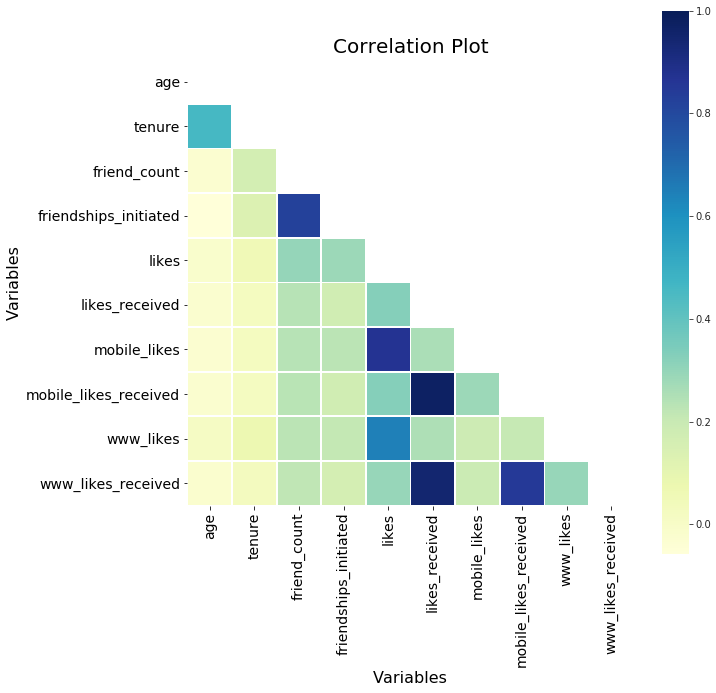

In [19]:
corr = fb_hm.corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10)) 
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True,cmap="YlGnBu", linewidths=.8)
ax.set_title('Correlation Plot', size=20)
ax.set_xlabel('Variables', size=16)
ax.set_ylabel('Variables', size=16)
ax.set_xticklabels(cols,fontsize=14)
ax.set_yticklabels(cols,fontsize=14)

### Likes by Birth Year & month

1. As years are increasing on x-axis there are more number of likes, depicting extensive usage of facebook
2. Month prominence for year 1994-95, two months standout in number of likes September & March (fun observation)

Text(114,0.5,'Months')

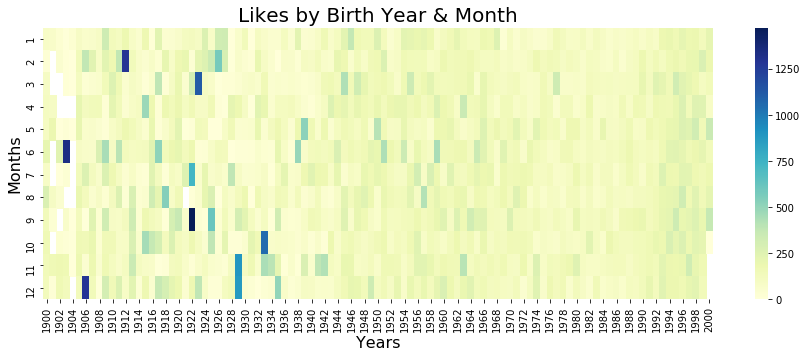

In [20]:
fb_likes = pd.pivot_table(fb,index='dob_month', columns='dob_year',values= 'likes', aggfunc='mean')
fig, ax = plt.subplots(figsize=(15,5)) 
x = sns.heatmap(fb_likes, cmap="YlGnBu", ax=ax)
ax.set_title('Likes by Birth Year & Month', size=20)
ax.set_xlabel('Years', size=16)
ax.set_ylabel('Months', size=16)

In [21]:
### Tenure by Birth Year & month

The early years seem to have more mean tenure, might be facebook pages or public user accounts that are mass followed

SyntaxError: invalid syntax (<ipython-input-21-2af5ed324025>, line 3)

In [ ]:
fb_likes = pd.pivot_table(fb,index='dob_month', columns='dob_year',values= 'tenure', aggfunc='mean')
fig, ax = plt.subplots(figsize=(15,5)) 
x = sns.heatmap(fb_likes, cmap="YlGnBu", ax=ax)
ax.set_title('Tenure by Birth Year & Month', size=20)
ax.set_xlabel('Years', size=16)
ax.set_ylabel('Months', size=16)

### Likes received (depicting popularity)

1. It's a many to one relationship, many people give likes to a user. 
2. Top users's likes show shift of people preferences towards mobile apps rather than site (mostly higher mobile likes than site likes)

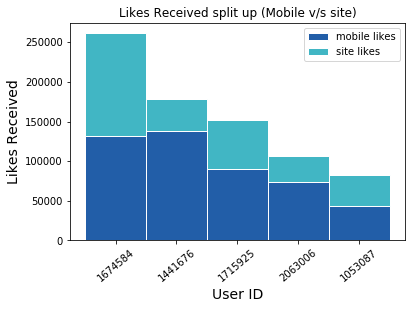

In [22]:
#'#F8B195','#F67280','#C06C84','#6C5B7B', '#355C7D'
# '#225ea8', '#41b6c4', '#a1dab4', '#ffffcc'
# libraries
import matplotlib.pyplot as plt
fb_toplikes_received=fb.sort_values(by='likes_received', ascending=False)[:5]
    
# Values of each group
bars1 = fb_toplikes_received['mobile_likes_received']
bars2 = fb_toplikes_received['www_likes_received']

# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = fb_toplikes_received['userid']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#225ea8', edgecolor='white', width=barWidth, label='mobile likes')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#41b6c4', edgecolor='white', width=barWidth, label='site likes')
 
# Custom X axis
plt.xticks(r, names, rotation =40)
plt.xlabel("User ID", size = 14)
plt.ylabel("Likes Received", size = 14)
plt.title("Likes Received split up (Mobile v/s site)")
plt.legend(loc='best')
 
# Show graphic
plt.show()

### Likes given (depicting individual preference)

1. It's a one to many relationship, a user gives likes to many people. 
2. Top 4,6,7 & 10 user prefer the site more than mobile app
3. Still a general skew towards mobile app

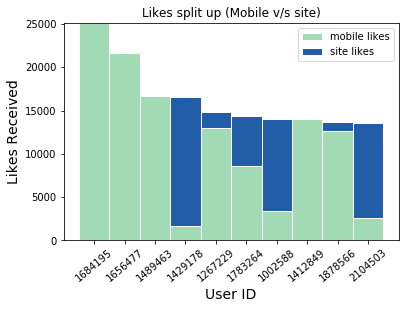

In [23]:
# libraries
import matplotlib.pyplot as plt
fb_toplikes=fb.sort_values(by='likes', ascending=False)[:10]
    
# Values of each group
bars1 = fb_toplikes['mobile_likes']
bars2 = fb_toplikes['www_likes']

# The position of the bars on the x-axis
r = range(10)
 
# Names of group and bar width
names = fb_toplikes['userid']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#a1dab4', edgecolor='white', width=barWidth, label='mobile likes')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#225ea8', edgecolor='white', width=barWidth, label='site likes')
 
# Custom X axis
plt.xticks(r, names, rotation =40)
plt.xlabel("User ID", size = 14)
plt.ylabel("Likes Received", size = 14)
plt.title("Likes split up (Mobile v/s site)")
plt.legend(loc='best')
 
# Show graphic
plt.show()

### Gender Preference

1. Interesting obsservation for gender specific interaction with facebook: women like as well as are liked a lot more than men (nearly 2.5 as much).
2. Generically these likes & likes received are comparable to each other for both men & women.
3. Same behaviour is true when the likes/like received are split up between mobile & site, here it's nearly 3 times more in some cases.

### Friends Counts & Friendships initiated

Women have more friends than men on facebook, the friendships initiated in proportion to friend count are more in case of men than women


In [24]:
fb_gender=fb.fillna("NA")
fb_gender_pivot=fb_gender.pivot_table(index='gender', values=['likes','likes_received'],aggfunc='mean')

In [25]:
fb['gender'].value_counts()

male      58574
female    40254
nan         175
Name: gender, dtype: int64

In [26]:
fb_gender_pivot

,likes,likes_received
gender,,
female,260.051324,251.435435
male,84.677895,67.911548
nan,138.508571,157.382857


In [27]:
# Drop NA as it is very minute
mask_g=fb_gender_pivot.index.values!='NA'
fb_gender_pivot=fb_gender_pivot[mask_g]

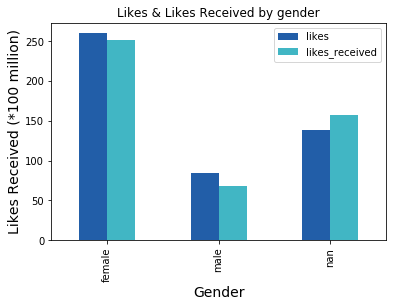

In [28]:
fb_gender_pivot.plot(kind='bar',color=mycolors)
plt.xticks(size=10)
plt.xlabel("Gender", size = 14)
plt.ylabel("Likes Received (*100 million)", size = 14)
plt.title("Likes & Likes Received by gender")
plt.legend(loc='best')

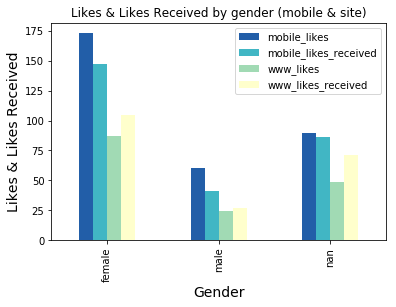

In [29]:
fb_gender=fb.fillna("NA")
fb_gender_pivot=fb_gender.pivot_table(index='gender', values=['mobile_likes', 'mobile_likes_received',
       'www_likes','www_likes_received'],aggfunc='mean')
# Drop NA as it is very minute
mask_g=fb_gender_pivot.index.values!='NA'
fb_gender_pivot=fb_gender_pivot[mask_g]
fb_gender_pivot.plot(kind='bar',color=mycolors)
plt.xticks(size=10)
plt.xlabel("Gender", size = 14)
plt.ylabel("Likes & Likes Received", size = 14)
plt.title("Likes & Likes Received by gender (mobile & site)")
plt.legend(loc='best')

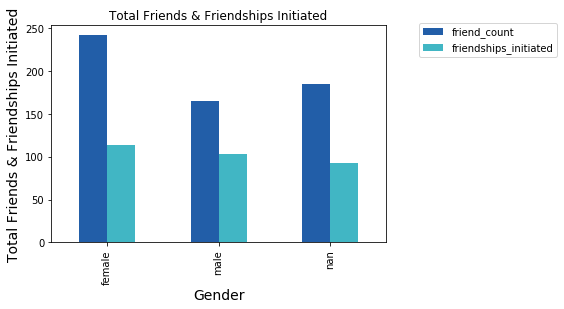

In [30]:
fb_gender=fb.fillna("NA")
fb_gender_pivot=fb_gender.pivot_table(index='gender', values=['friend_count', 'friendships_initiated'],aggfunc='mean')
# Drop NA as it is very minute
mask_g=fb_gender_pivot.index.values!='NA'
fb_gender_pivot=fb_gender_pivot[mask_g]
fb_gender_pivot.plot(kind='bar',color=mycolors)
plt.xticks(size=10)
plt.xlabel("Gender", size = 14)
plt.ylabel("Total Friends & Friendships Initiated", size = 14)
plt.title("Total Friends & Friendships Initiated")
plt.legend(loc=(1.1,.85))

### Users w.r.t birth year

We see bumps between 1940 to 1980. After 1980 the no. users rocket. Since the data is till 2000 (we see miniscule value in 2000)

In [31]:
fb_yearwise=fb[['dob_year','userid']].drop_duplicates().sort_values(by='dob_year')

In [32]:
fb_yearwise=fb_yearwise.reset_index()
fb_yearwise.head(2)

,index,dob_year,userid
0,45453,1900,1708305
1,55697,1900,1591019


In [33]:
fb_yearwise=fb_yearwise.groupby(['dob_year'])[['userid']].agg('count')
fb_yearwise.columns=['No. of Users']

Text(0.5,1,'Total no. of Users w.r.t birth year')

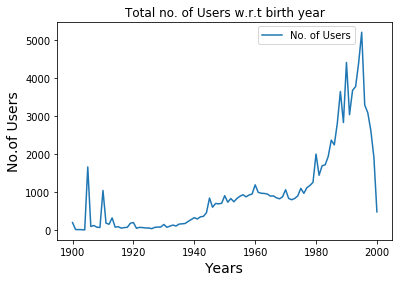

In [34]:
fb_yearwise.plot(kind='line')
plt.legend(loc=(0.60,0.9))
plt.xlabel("Years", size = 14)
plt.ylabel("No.of Users", size = 14)
plt.title("Total no. of Users w.r.t birth year")

Text(0.5,1,'Age wise distribution of Users')

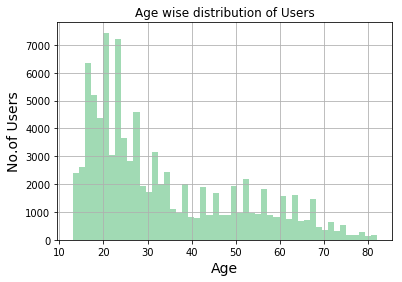

In [35]:
age=pd.Series(rem_out(fb['age']))
age.hist(bins=50, color='#a1dab4')
plt.xlabel("Age", size = 14)
plt.ylabel("No.of Users", size = 14)
plt.title("Age wise distribution of Users")

# 3. Modelling

We will try to predict likes received on the basis of other predictors (leaving out inter-related variables such as likes received from mobile, site etc.). This is to understand dependence of profile visibility on the variables that are given.

In [36]:
model_columns=['age','gender',
       'tenure', 'friend_count', 'friendships_initiated', 'likes',
       'likes_received']


In [37]:
fb_model = fb[model_columns]
fb_model.head()

,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received
0,14,male,266.0,0,0,0,0
1,14,female,6.0,0,0,0,0
2,14,male,13.0,0,0,0,0
3,14,female,93.0,0,0,0,0
4,14,male,82.0,0,0,0,0


In [38]:
#y = fb_model.likes
#fb_model.drop('likes', 1)
fb_model['gender'] = fb_model['gender'].fillna('male')
fb_model['tenure'].fillna((fb_model['tenure'].mean()), inplace=True)

fb_model.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received
0,14,male,266.0,0,0,0,0
1,14,female,6.0,0,0,0,0
2,14,male,13.0,0,0,0,0
3,14,female,93.0,0,0,0,0
4,14,male,82.0,0,0,0,0


In [39]:
fb_model.loc[fb_model.gender != 'female', 'gender'] = 1
fb_model.loc[fb_model.gender == 'female', 'gender'] = 0
fb_model.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received
0,14,1,266.0,0,0,0,0
1,14,0,6.0,0,0,0,0
2,14,1,13.0,0,0,0,0
3,14,0,93.0,0,0,0,0
4,14,1,82.0,0,0,0,0


In [40]:
X, y = fb_model.drop(columns = ['likes']), fb_model['likes']

In [41]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train) # Set up the model
result = model.fit() # Fit model (find the intercept and slopes)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     3011.
Date:                Wed, 22 May 2019   Prob (F-statistic):               0.00
Time:                        21:56:59   Log-Likelihood:            -5.3216e+05
No. Observations:               69302   AIC:                         1.064e+06
Df Residuals:                   69296   BIC:                         1.064e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
age                       1.52

In [43]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators = 100, max_depth = 5, random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [44]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 111.66230158939143
Mean Squared Error: 166255.1559945985
Root Mean Squared Error: 407.7439833947259


In [417]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of Grid search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [418]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_


Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_s

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min


[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total= 1.3min
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=  15.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=  23.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=  23.0s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=  15.0s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=  14.8s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=  14.9s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=  22.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total= 1.2min
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=  14.7s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=  14.7s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=  14.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total= 1.8min
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=  21.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=  21.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total= 1.8min
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3,

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.2min


[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=  21.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=  31.9s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=  31.8s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=  31.9s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=  21.3s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=  21.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=  32.0s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=  32.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=  17.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=  17.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total= 1.8min
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=  25.9s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=  16.8s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total= 1.4min
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=  16.9s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=  16.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   8.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total= 1.4min
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=  16.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=  16.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_s

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=  12.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=  12.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total= 1.4min
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=  25.8s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_sa

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 29.3min


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total= 2.0min
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=  24.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=  36.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=  37.0s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=  21.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=  21.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=  21.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=  32.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=  20.9s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total= 1.8min
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=  20.7s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=  20.7s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3

[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100, total=   8.0s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total= 1.4min
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=  15.9s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=  15.9s
[CV] bootstrap=True, max_depth=100, max_feat

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   7.9s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total= 1.4min
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total= 1.3min
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=  15.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_fea

[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   8.0s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total= 1.3min
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total= 1.3min
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   7.7s
[CV] bootstrap=True, max_depth=100, max_feat

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, total=  11.8s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=  34.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, total=  11.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, total=  10.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_fea

[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=  32.7s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=  32.7s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=  10.8s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=  10.8s
[CV] bootstrap=True, max_depth=100, max_fea

[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=  32.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=  32.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=  32.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 55.0min


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total= 1.8min
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total= 1.8min
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=  10.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total= 1.8min
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_fea

[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total= 1.4min
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total= 1.4min
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100, total=   8.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100, total=   8.2s
[CV] bootstrap=True, max_depth=110, max_feat

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=  24.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   8.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   8.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   8.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_fea

[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=  24.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=  24.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   8.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   7.8s
[CV] bootstrap=True, max_depth=110, max_fea

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=  22.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=  33.7s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=  33.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, total=  11.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_f

[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total= 3.0min
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=  37.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=  56.4s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=  56.1s
[CV] bootstrap=True, max_depth=110, max_

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total= 3.1min
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=  37.0s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=  36.8s
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=  36.7s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_

[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 83.4min finished


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 300}

In [45]:
#Let's run Random Forest with the best params 
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators = 300, max_depth = 110, bootstrap = True, max_features = 3, min_samples_leaf = 4, min_samples_split=12)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [46]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 112.46524117254197
Mean Squared Error: 166304.20637777357
Root Mean Squared Error: 407.80412746534773
